# Prosjekt 2: foton-materie interaksjon

I denne oppgaven skal vi se på simulering av foton-materie interaksjon og bildedannelse fra røngten-stråling via monte Carlo simulasjoner. 


I dette prosjektet tar vi utgangspunkt i den numeriske metoden Monte Carlo for å simulere røntgenavbildning.  Røntgenstråling er elektromagnetisk stråling som ble oppdaget i 1895 av Wilhelm Rontgen. Det er fotoner med energi mellom 0.1 keV og 100 keV som har bølgelengde mellom (0.01 nm -10 nm).
Når røntgenstråling sendes gjennom materialet vil fotonet oppføre seg uavhengig av andre fotoner som sendes inn. Fotonet vil dog interaktere med stoffet det blir sendt gjennom. De to primære interaksjonene fotonet kan gjøre med matrialet som påvirker fotonets propagasjon er compton-spredning og fotoelektrisk effekt, dermed har man tre ulike utfall for fotonet. Fotonet vil enten gå uhindret gjennom materialet,eller blir dempet av et atom i  materialet, forsvinner og atomet blir ionisert det sendes ut et elektron (fotoelektrisk effekt). Et annet tilfelle er at fotonet og et elektron "kolliderer" hvor både fotonet og elektronet endrer retning og fotonets energi endres(copmtonspredning).
I dette prosjektet ser vi på en forenklet endimensjonal modell, hvor vi slår sammen fotoelektrisk effekt og compton spredning til en prossess: demping. Fotonet har da kun to mulige utfall ettersom det går gjennom matarialet, enten så blir det dempet på veien eller så kommer det gjennom materialet uhindret. 


Monte Carlo simulering er en numerisk metode som baserer seg på tilfeldige tall for å simulere en prosess eller beregne et resultat. Dvs vi ser på en gruppe av uavhengige prøver og studerer  utvikling av prøvene over tid. For at Monte Carlo metoden skal gi et godt resultat som er nær realistisk svar, må vi studere en gruppe av uavhengige elementer og antallet elementer må være stort nok for at små tilfeldigheter skal utjevnes. Monte Carlo metoden egner seg til å studere fotoner som sendes inn gjennom et materiale fordi fotoner som sendes inn i materialet oppfører seg tilfeldig (går gjennom eller blir dempet) og fordi vi kan sende inn mange fotoner uavhengige av hverandre. 

I dette prosjektet skal vi bruke Monte Carlo simulering til å først lage en endimensjonal modell for demping av fotoner. Deretter studerer vi nødvendige betingelser for god bildedannelse i et materiale bestående av vev og bein. Tilslutt bruker vi modellen vår til å skape bilder av tredimensjonale objekter og forsøker å identifisere disse.



## Oppgave 1: demping av fotoner

Vi skal nå bruke Monte Carlo metoder til å simulere propagasjon av fotoner i materialer. Vi forenkler dempningsprossessen og antar at sannsynligheten for at et foton blir dempet ved et spesifikt punkt er $p = \mu dx$, hvor $\mu$ er dempningskoeffsienten og $dx$ er steglengden. Det betyr at vi må sende ett og ett foton gjennom et stoff og så for hvert lengdesteg $dx$ sjekke om et tilfeldig generet tall $z \in (0,1)$ er større eller mindre enn $p$. 

In [17]:
'''Bibloteker'''

#Numpy for alt mulig
import numpy as np

# Matplotlib for plotting
import matplotlib.pyplot as plt

#For plots i notebook
%matplotlib notebook

from numba import jit #optimaliserer kjøretiden

import time #biblotek for tidtakning

In [18]:
'''Nyttige funksjoner'''

@jit(nopython = True)
def attenuation(dx, mu, N): #Ser hvor mange fotoner som blir dempet for ett lengdesteg. Inspirert av random walker eks.
    
    att = 0 # 0 = ikke dempet -> kommer hele veien frem 
    
    z = np.random.rand(N) #Array med N tilfeldige tall
    P = mu * dx #sannsynlighet for demping
    
    for i in range(N):
        if z[i] < P: #Hvis tallet er mindre enn propagasjons sanysnlighet -> demping
            att -= 1 # -1 = dempet, kommer ikke frem

    return att

@jit(nopython = True)
def nPhotons(t, dx, mu, N): #Beregning av hvor mange av de N fotonene som kommer gjennom når sendt gjennom objekt med tykkelse t
    
    present = np.zeros(round(t/dx)) #Array for de antall fotoner for hvert lengdesteg
    
    present[0] = N
    
    for i in range(1, round(t/dx)): #Iterer meg gjennom hele objektet og bruker attenuation-funksjonen 
        present[i] = present[i-1]
        att = attenuation(dx, mu[i], int(present[i-1]))
        present[i] += att
        

    return present #returnerer array med oversikt over antall fotoner 

def fileRead(filename): #Funksjon for fil lesning
    if filename.endswith('.txt'): #skal kun se på lesning av .txt og .npy filer, derfor kun relevant å ha med andre alternativer
        Emu = []
        with open(filename, 'r') as file: #Åpner filen og rydder litt før infoen lagres
            for line in file.readlines():
                line = line.strip()
                line = line.split(',')
                Emu.append([float(line[0].lower())*10**(3),float(line[1].lower())]) #Lagrer Energi-mu parene som en Nx2 - matrise
    
    elif filename.endswith('.npy'):
        Emu = np.load(filename) #Bruker numpys funksjon for å lese av .npy
        
    return np.array(Emu) #Returnerer Energi-mu parene som en numpy array




Velger over her å definere et par generelle funksjoner som vil bli brukt i alle oppgavene. De to første funksjonene tar for seg simulasjon av en-dimensjonal demping av et foton gjennom et materiale med tykkelse $t$. Den aller første funksjonen attenuation() regner ut hvor mange fotoner som blir dempet for et enkelt lengdesteg, mens den andre funksjonen nPhotons() gjenbruker den første og regner ut hvor mange som blir dempet for hele tykkelsen av stoffet. Den siste funksjonen fileRead() leser energi-mu par fra ulike filformater og returnerer de som en Nx2 matrise. 

In [19]:
'''Oppgave 1'''

#definerer noen konstanter

#Lar lengdeenhet være 1 cm

dx =  0.1 #lengdesteg
mu = 0.1 #dempnings koeffsient


print("Fotonets tilstand(0 = ikke dempet, -1 = dempet) ved dx = 0.1: ", attenuation(dx,mu, 1))

dx = 5
print("Fotonets tilstand(0 = ikke dempet, -1 = dempet) ved dx = 5: ", attenuation(dx,mu, 1))


Fotonets tilstand(0 = ikke dempet, -1 = dempet) ved dx = 0.1:  0
Fotonets tilstand(0 = ikke dempet, -1 = dempet) ved dx = 5:  -1


Sender her inn et foton gjennom ett stoff av lengde lik lengdesteget. Med $\mu = 0.1$ og $dx = 0.1 cm$ er det noe flere tilfeller av at fotonet kommer helt til enden av veien enn hvor det blir attunert, noe som gir mening da sannsynligheten for attuenasjon er $p =\mu \cdot dx = 0.1 $ altså en relativt lav sannsynlighet. Dersom $dx = 5$ er det ca 50-50 om fotonet kommer frem eller ikke. Vi vet fra den analytiske løsningen illustrert i figur 2 i oppgavebeskrivelsen at med $\mu = 0.1$ skal intensiteten approksomativt halveres ved enden av materiale, noe som tyder på at det er riktig å bruke $dx = 5$. Dette betyr at forholdet mellom $dx$ og $\mu$ burde være $dx = \mu \cdot 50.$ 

Samtidig må $dx$ gi en god representasjon av x-aksen, kan derfor ikke i de fleste tilfeller la $dx = 50\mu$ da vi vil få altfor for få x-verdier til å danne en representativ modell for stoffet. Tar man så høyda for at man kommer til å sende gjennom mange flere fotoner enn et gjennom et stoff som er mye tykkere enn $1 cm$. Så er det fornuftig å bruke en $dx$ som heller er tilpasset etter hvor mange verdier man ønsker. Bruker derfor $dx = 0.1$ i plottingen under slik at man får en x-akse med 100 verdier. Mange x-verdier og et høyt antall fotoner vil kompansere for lav sannsynlighet $p = \mu dx$ slik at man får en approksimasjon svært nær analytisk løsning.

<IPython.core.display.Javascript object>


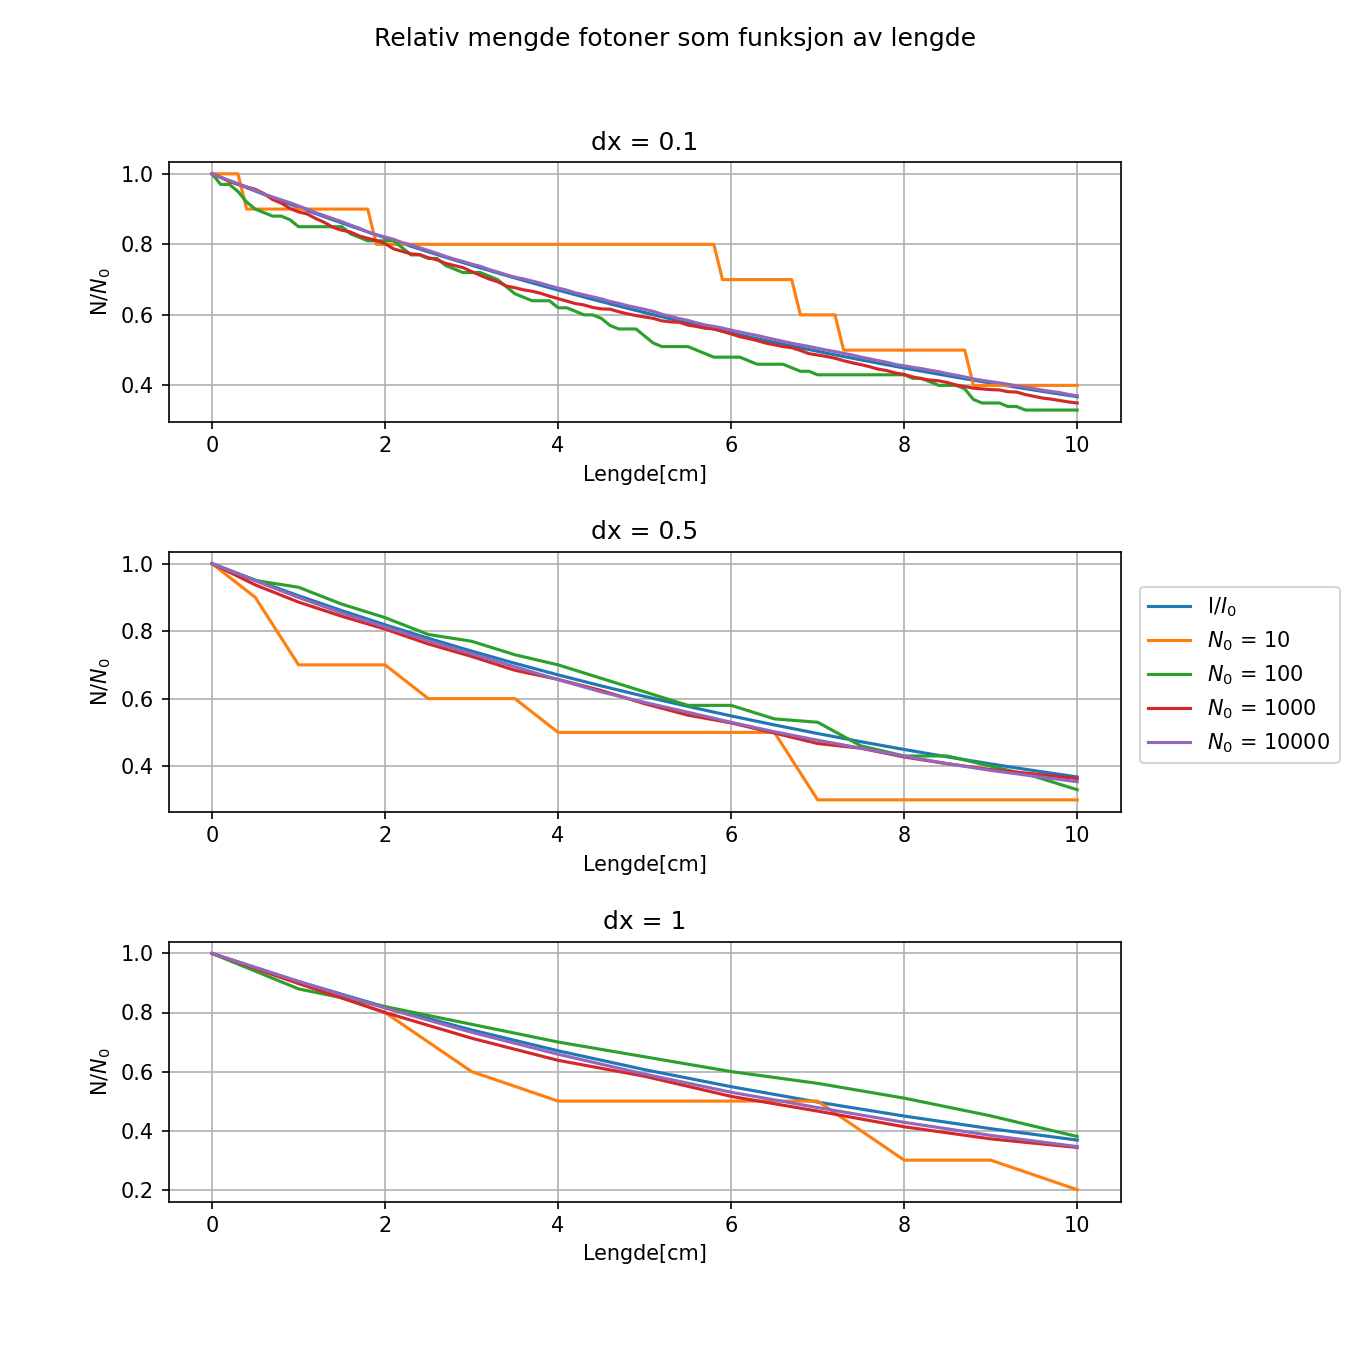

In [21]:
'''Oppgave 1: plotting'''

#definerer noen konstanter
t = 10 #tykkelse/lengde
dx = t/100 #step size

x = np.arange(0,t + dx, dx)
x1 = np.arange(0,t + dx*5, dx * 5)
x2 = np.arange(0, t + dx*10, dx * 10)

mu = 0.1 #attenuation coefficient


# Velger et utvalg av antall fotoner å simulerer
Nvec = [10, 100, 1000, 10000]
def I(x): 
    return np.exp(-mu*x) #Analytisk intensitet I/I_0


fig, axs = plt.subplots(3,figsize=(9,9)) # Plotter resultatene sammen med analytisk løsning

axs[0].plot(x, I(x), label = r'I/$I_0$')
axs[1].plot(x1, I(x1))
axs[2].plot(x2, I(x2))

for n in Nvec:
    makeIt = nPhotons(t + dx,dx,mu * np.ones(x.size), n)
    axs[0].plot(x,makeIt/n, label = r'$N_0$' + f' = {n} ')
    
    makeIt = nPhotons(t + dx * 5,dx * 5,mu * np.ones(x1.size), n)
    axs[1].plot(x1,makeIt/n)
    
    makeIt = nPhotons(t + dx * 10,dx *10 ,mu * np.ones(x2.size), n)
    axs[2].plot(x2,makeIt/n)


axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_title('dx = 0.1')
axs[1].set_title('dx = 0.5')
axs[2].set_title('dx = 1')

axs[0].set_xlabel('Lengde[cm]')
axs[0].set_ylabel(r'N/$N_0$')
axs[1].set_xlabel('Lengde[cm]')
axs[1].set_ylabel(r'N/$N_0$')
axs[2].set_xlabel('Lengde[cm]')
axs[2].set_ylabel(r'N/$N_0$')

fig.legend(loc = 7)
fig.subplots_adjust(right = 0.83, hspace = 0.5)
fig.suptitle('Relativ mengde fotoner som funksjon av lengde')
fig.show()

Plottene viser at alle $dx$ verdiene gir brukbare resultater for store N, men $dx = 0.1$ gir klart best resultater da den analytiske kurven og kurven for $N = 10 000$ er så si umulig å skille fra hverandre. $dx = 0.5$ gir også svært gode resultater selv om man noen ganger kan skille analytisk løsning fra simulert kurve. Observerer og at $N = 1000$ ligger nokså nærme den analytiske løsningen og kan forsvarlig brukes i senere oppgaver.

## Oppgave 2: Røngten stråling 
Ser nå på et mer håndfast med tilfelle med røngten stråling gjennom bein og mykt vev. Vi vil nå studere forskjeller i intensitet, kontrast og dosering for en et materiale bestående av bein og vev, slik at vi kan diskutere hvilke betingelser man burde ha for å få et skarpt bilde men samtidig holde dose nivået nede.

<IPython.core.display.Javascript object>


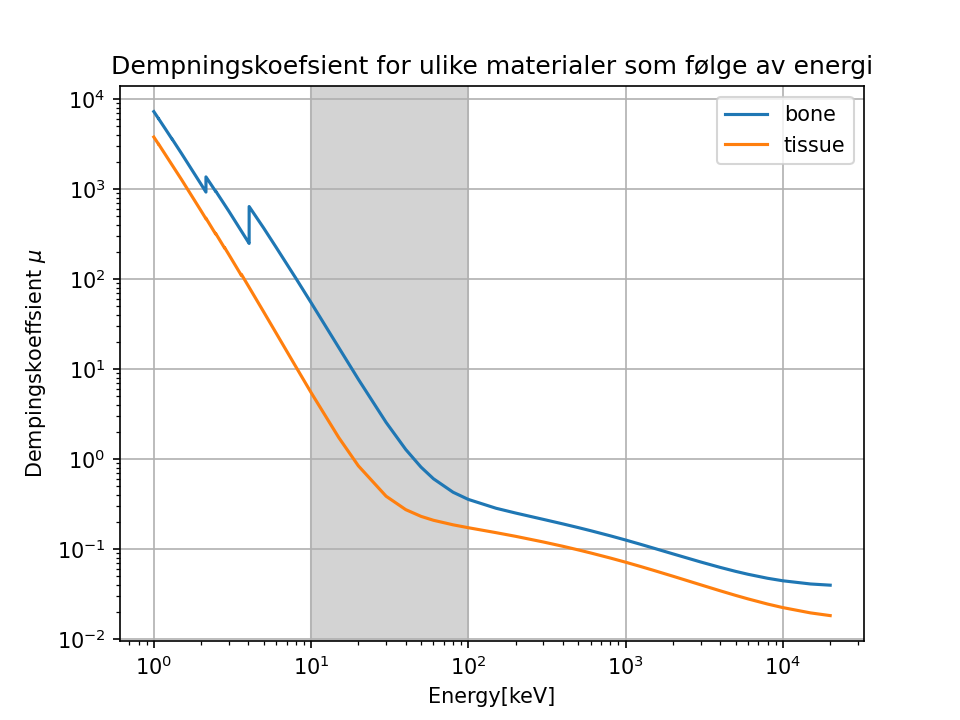

In [41]:
'''Oppgave 2: Lesing av fil'''

#Definerer konstanter

rhoB = 1.92
rhoT = 1.02

tT = 3
tB = 1

# finner så energi- mu parene for bein og vev
EmuB = fileRead('bone.txt') 


EmuT = fileRead('tissue.txt')


EmuB[:,1] = EmuB[:,1] * rhoB #Ganger bort massetetthetten 
EmuT[:,1]= EmuT[:,1] * rhoT

# Plotter energi - mu parene logaritmisk
plt.figure(2)

plt.loglog(EmuB[:,0], EmuB[:,1], label = 'bone')
plt.loglog(EmuT[:,0], EmuT[:,1], label = 'tissue')
plt.axvspan(10, 100, color = 'lightgrey')
plt.ylabel(r'Dempingskoeffsient $\mu$')
plt.xlabel('Energy[keV]')
plt.title('Dempningskoefsient for ulike materialer som følge av energi')
plt.legend()
plt.grid()
plt.show()


Relevant energi markert i grått. Ser at dempningskoeffsiententene for det relevante området er høyere for bein enn vev, men er ellers svært like i utvikling ettersom energien øker. 

In [23]:
'''Oppgave 2: funksjoner '''

def getRelevantPair(EmuB, EmuT, upper, lower):
    RelEmuB = EmuB[EmuB[:,0]<upper] #Finner de relevante Energi-mu parene som er slik at E er i området 10 - 100 keV
    RelEmuB = RelEmuB[RelEmuB[:,0] > lower] 

    RelEmuT = EmuT[EmuT[:,0]<upper] #Gjør dette for Tissue og bone parene
    RelEmuT = RelEmuT[RelEmuT[:,0] > lower]
    
    
    
    return RelEmuB, RelEmuT
    

def getIntensity(RelEmuB, RelEmuT, tT, tB, dx, N): #Funksjon for bergening av to intensiteter gjennom bone og tissue

    N1 = [] #Tissue array
    N2 = [] #Tissue-bone-tissue array
    
    if isinstance(N, float) or isinstance(N, int): # Sjekker om N er et tall, hvis det stemmer så oppretter jeg en N-liste/array
        N = np.ones(RelEmuB[:,0].size) * N
    
    for i in range(RelEmuB[:,0].size): #Går gjennom alle energi nivåene
        mu1 = np.ones(int(tT/dx))* RelEmuT[i,1] #Finner mu til tissue-strålejn

        mu2 = np.ones(int(tT/dx))* RelEmuT[i,1] #Finner mu til tissue- bone-tissue-strålen
        mu2[int(tB/dx):int(2*tB/dx)] = RelEmuB[i,1] #Slicer for å legge inn mu for bone

        N1.append(nPhotons(tT,dx,mu1,N[i])[-1]) #Leggr til antall fotoner som kommer gjennom stoffet
        N2.append(nPhotons(tT,dx,mu2,N[i])[-1])



    I1 = np.array(N1) * RelEmuT[:,0] #Regner intensiteten I1 er for tissue
    I2 = np.array(N2) * RelEmuT[:,0] #I2 for tissue-bone-tissue
    I0 = RelEmuT[:,0] * N #Start intensitet
    
    return I1, I2, I0

def Contrast(I1,I2): # funksjon for beregning av konstentrasjon
    Cvec = np.zeros(I1.size)
    for i in range(I1.size):
        if I1[i] == 0: # Håndterer deling på null problemer
            Cvec[i] = 0
        else:
            Cvec[i] = (I1[i]- I2[i])/I1[i]
    return Cvec

def D(Natt, E, Vrho): #Beregning av dosen, slår sammen V og rho for enklere oppdeling av stoffer
    return Natt * E / (Vrho)


def minN1(minI, E, mu, tT, dx, Nstart, t1): #Funksjon for beregning av minste antall funksjoner for et energinivå
    N = Nstart #Startverdi for antall fotoner
    I = nPhotons(tT,dx,mu,N)[-1] * E #Regner ut start intensitet
    
    while I <= minI: #Hvis I < minI så øker vi antallet fotoner til I >= minI
        N +=1
        I = nPhotons(tT,dx,mu,N)[-1] * E
        
        if time.time() - t1 > 10: #Hvis dette tar mer enn 10 sekunder avbryter vi for å unngår evig løkke
            N = 1 #Setter da N = 1 og I = 0 som symboler for at man aldri når grensen
            I = 0
            break
        elif time.time() - t1 > 5: #Hvis det tar mer enn 5 sekunder prøver vi å la N øke mye raskerer for å se om det gir resultater
            N += 1000
    return [N,I] #Returnerer minste antall fotoner og intensiteten til disse fotone
    

def minN(minI, RelEmuT, tT, dx, Nstart): #Beregning av minste antall fotoner for flere energinivåer
    leng = RelEmuT[:,0].size #Nyttig lengde størrelse ; Antall forskjellige E-verdier
    NIvec = [] #Array/matrise til å inneholde minste antall fotoner og tilhørende intensitet
    
    for i in range(leng): #Itererer gjennom alle energinivåene
        mu1 = np.ones(int(tT/dx)) * RelEmuT[i,1] #Spesifikk mu verdi 
        
        t1 = time.time() #Start tid som brukes for å unngå evig løkke
        NIvec.append(minN1(minI, RelEmuT[i,0], mu1, tT, dx, Nstart, t1))
        
    return np.array(NIvec) #Returnerer N - I parene som en matrise



Velger i cellen over å definere en del nye funksjoner til bruk i oppgave 2. En liten oppsummering av funksjonenes formål er gitt nedenfor.

* getRelevantPair(): Tar inn Energi-mu matriser på samme format som i fileRead() sender ut, øvre energinivå og nedre energinivå. Filterer så bort alle energi-mu par som har energier utenfor øvre- og nedre energinivå. Returnere Nx2 matrise.

* getIntensity(): Tar in energi-mu matriser, tykkelse til to forskjellige stoff, steglengde og antall fotoner. Regener ut antall fotoner som er igjen ved enden av stoffet og bruker disse til å regne ut intensiteten. Returnerer start-intensitet, intensitet for fotoner gjennom tissue og intensitet for fotener gjennom bone og tissue. 

* Contrast(): regner ut relativ kontrast mellom to intensiteter, håndterer null-divisjon problemer

* D(): regner ut dose

* minN1(): regner ut hvor mange fotoner som trengs for å nå minimums intensitet for et enkelt energinivå. Bruker en while løkke som sjekker kravet. Returnerer En liste bestående av antall fotoner og den tilhørende intensiteten for det energinivået. For å unngå evig loop så tar funskjonen inn starttid og hvis det er gått mer enn 10 sekunder så avbrytes løkken. Etter 5 sekunder prøver vi å øke antall fotoner som legges til for hver iterasjon for å se om det gir resultater.

* minN(): regner ut hvor mange fotoner som trengs for å nå minimum intensitet for en liste av energinivåer. Returnerer En Nx2 matrise med antall fotoner og tilhørende intensitet som par. 

<IPython.core.display.Javascript object>


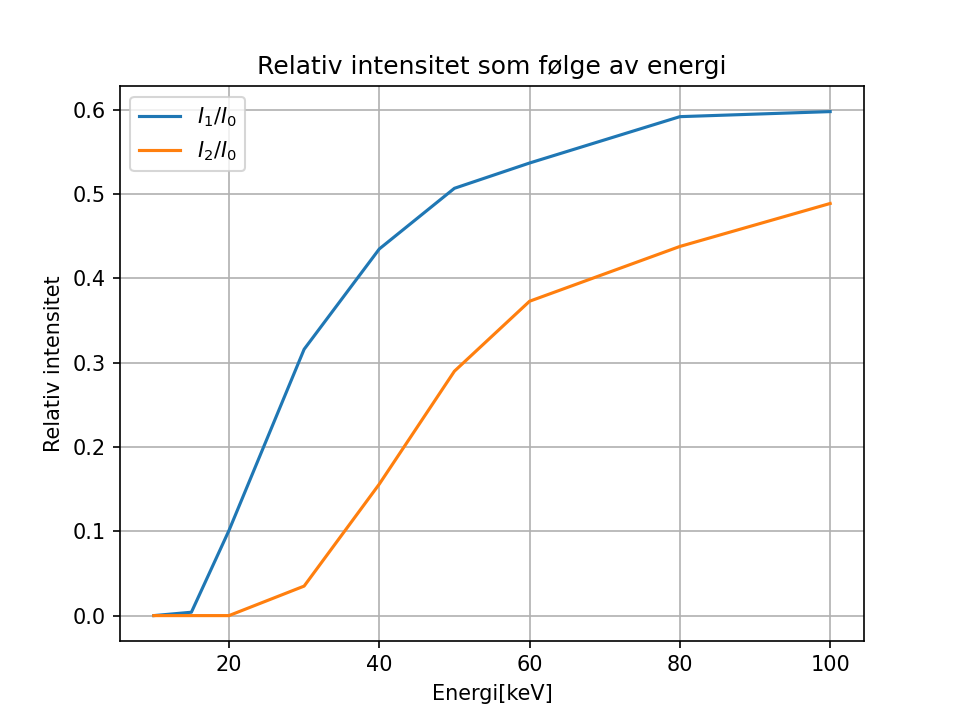

In [27]:
'''Oppgave 2: Intensitet'''

dx = tT/100 #Steglengde
N = 1000 #Antall fotoner

RelEmuB, RelEmuT = getRelevantPair(EmuB, EmuT, 101, 9.9) #Får de relevante Energi-mu parene

I1, I2, I0 = getIntensity(RelEmuB, RelEmuT, tT, tB, dx, N) #Finner intensitet

plt.figure(3) #Plotter intensitetene som funksjon av Energien


plt.plot(RelEmuT[:,0], I1/I0, label = r'$I_1/I_0$')
plt.plot(RelEmuT[:,0], I2/I0, label = r'$I_2/I_0$')

    
plt.grid()
plt.legend()
plt.xlabel('Energi[keV]')
plt.ylabel('Relativ intensitet')
plt.title('Relativ intensitet som følge av energi')
plt.show()


<IPython.core.display.Javascript object>


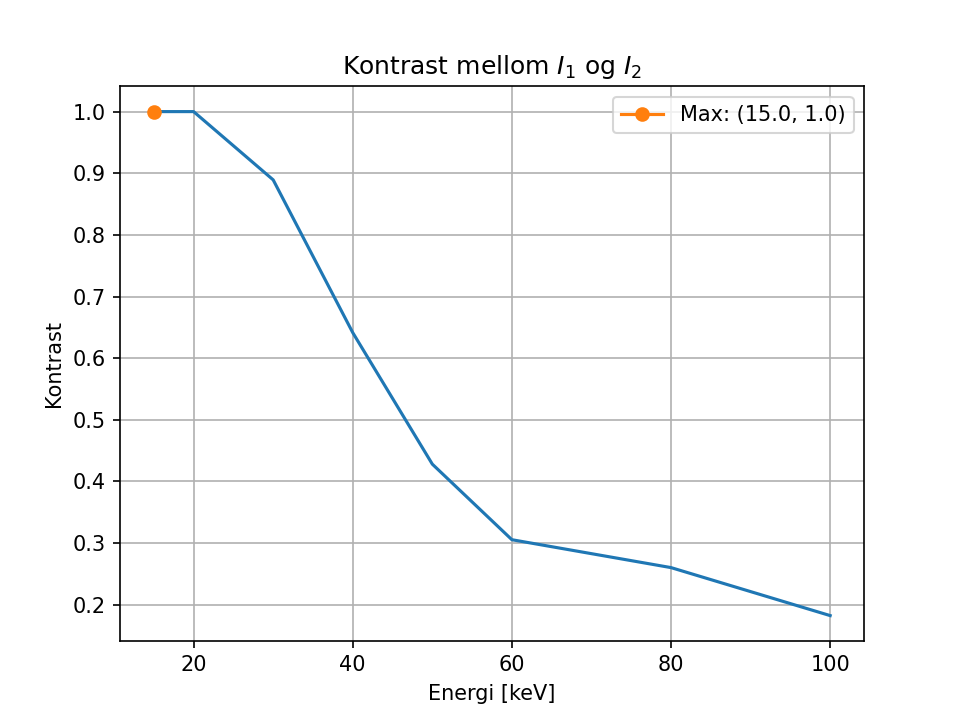

In [28]:
'''Oppgave 2: Kontrast'''

C = Contrast(I1, I2) #Regner ut konstenrasjoen og plotter den som funksjon av energi

plt.figure(4)
plt.plot(RelEmuT[1:,0], C[1:])
plt.grid()
plt.plot(RelEmuT[np.where(C == np.max(C))[0][0],0], np.max(C), label = f'Max: {(RelEmuT[np.where(C == np.max(C))[0][0],0], round(np.max(C),2))}', marker = 'o') #Legger inn max punkt
plt.xlabel('Energi [keV]')
plt.legend()
plt.ylabel('Kontrast')
plt.title(r'Kontrast mellom $I_1$ og $I_2$')
plt.show()



Energier rundt 20 keV gir altså best kontrast. Har her ikke plottet med de første energiene som kun gir null over null kontrast.  

<IPython.core.display.Javascript object>


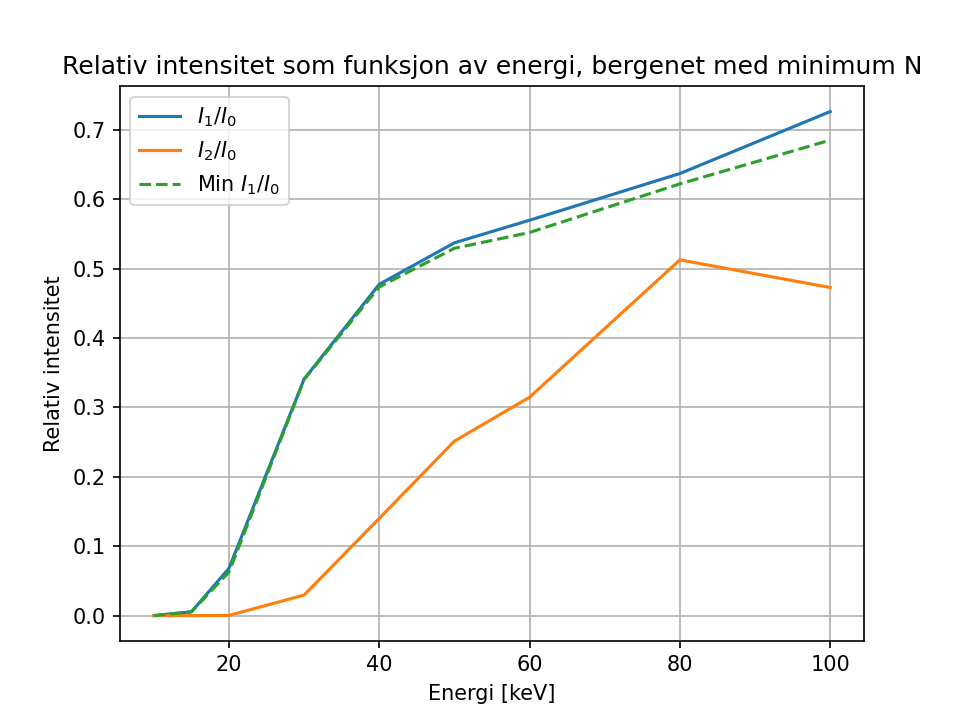

In [29]:
'''Oppgave 2: minimum antall fotoner'''
minI1 = 1e4 #10 MeV
NI1vec = minN(minI1, RelEmuT, tT, dx, 10)

I1, I2, I0 = getIntensity(RelEmuB, RelEmuT, tT, tB, dx, NI1vec[:,0])  #Regner ut intensitet med minste N -verdi for I1
plotMinI1 = minI1*np.ones(RelEmuT[:,0].size) #Array for plotting av  realtiv minimium MinI1
plotMinI1[NI1vec[:,1] == 0] = 0 #Dersom noen av min I = 0(dvs de energiene hvor minI1 aldri nåes), så settes minI1 = 0 for finere plott

plt.figure(5) #plotter relativ intensitet som funksjon av E
plt.plot(RelEmuT[:,0], NI1vec[:,1]/I0, label = r'$I_1/I_0$')
plt.plot(RelEmuT[:,0], I2/I0, label = r'$I_2/I_0$')
plt.plot(RelEmuT[:,0], plotMinI1/I0, '--', label = r'Min $I_1/I_0$')
plt.grid()
plt.title('Relativ intensitet som funksjon av energi, bergenet med minimum N')
plt.legend()
plt.xlabel('Energi [keV]')
plt.ylabel('Relativ intensitet')
plt.show()


For energier lavere enn 15 keV nåes aldri minimumskravet, derfor er den null der. Observerer at $I_1$ følger Min $I_1$ veldig tett men ligger alltid litt over som er det vi ønsker, ser at $I_2$ alltid ligger under kravet og vil dermed registres som 0 i intensitet. Dermed vil vi oppnå maksmial kontrast lik 1. 

<IPython.core.display.Javascript object>


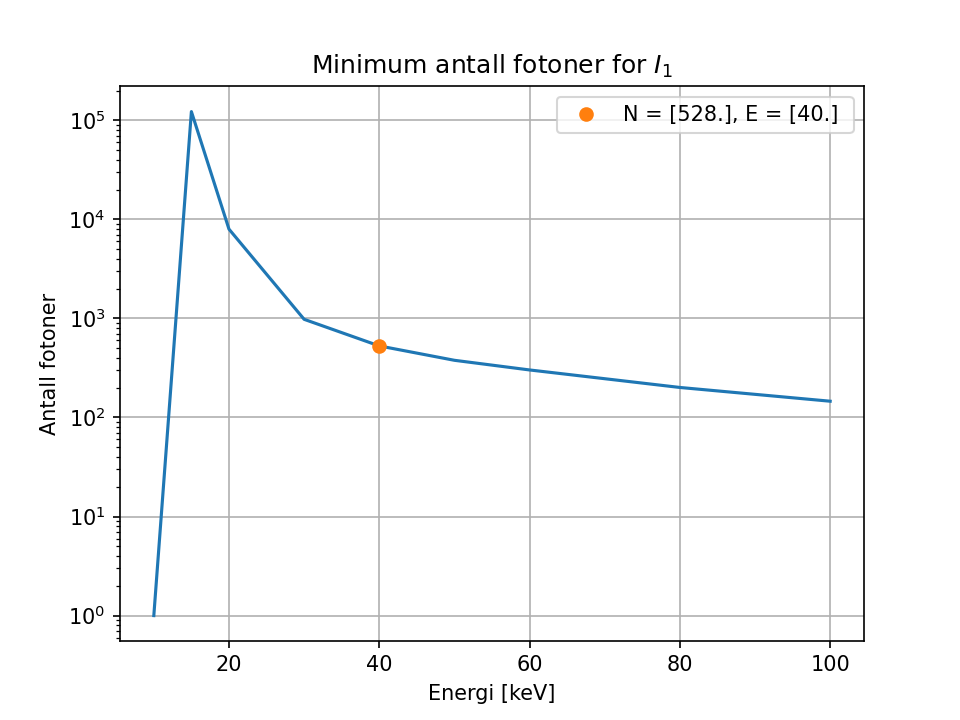

In [30]:
'''Oppgave 2: minimum antall fotoner forts.'''
plt.figure(6)
plt.plot(RelEmuT[:,0], NI1vec[:,0]) #Plotter minimum antall fotoner for I1 som funksjon av energien.
plt.plot(RelEmuT[RelEmuT[:,0] == 40, 0], NI1vec[RelEmuT[:,0]==40,0],'o', label = f'N = {NI1vec[RelEmuT[:,0]==40,0]}, E = {RelEmuT[RelEmuT[:,0] == 40, 0]} ') #markerer relevant punkt for senere referanse
plt.grid()
plt.legend()
plt.yscale('log')
plt.title(r'Minimum antall fotoner for $I_1$')
plt.xlabel('Energi [keV]')
plt.ylabel('Antall fotoner')
plt.show()



Kravet krever altså eksremt mange fotoner for de lavere energiene før det stabiliseres på et nivå rundt et parr hundre fotoner. Har markert $E = 40 keV$ for neste deloppgave. De energiene som har 0 antall fotoner er enrgier hvor intensitetsgrensen aldri ble nådd.

<IPython.core.display.Javascript object>


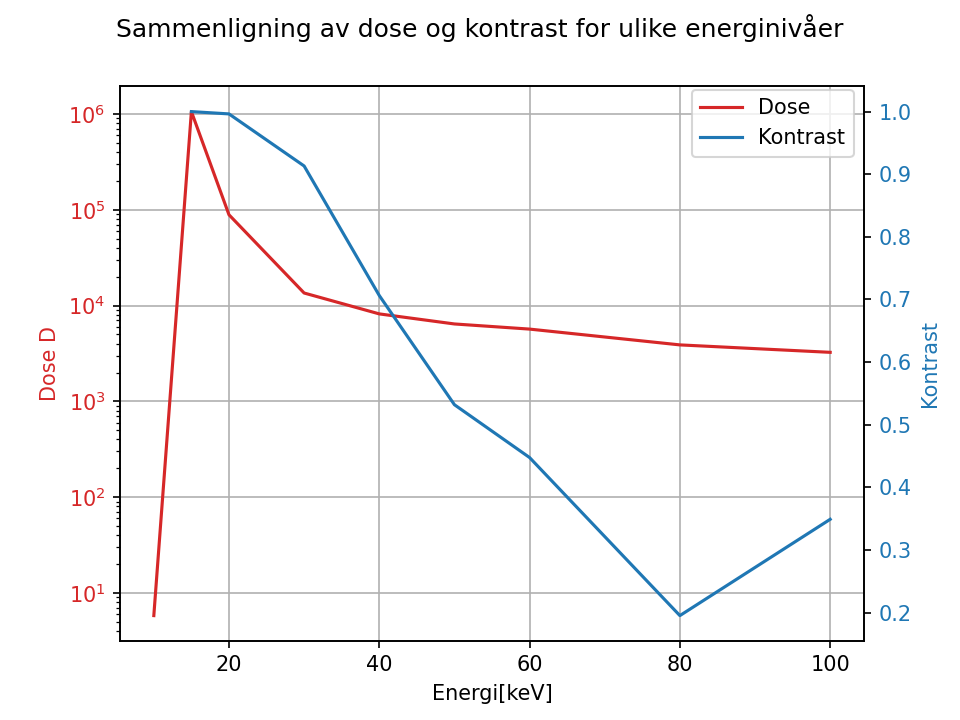

In [31]:
'''Oppgave 2: dosering '''

Dose1 = D(NI1vec[:,0] - NI1vec[:,1]/RelEmuT[:,0], RelEmuT[:,0], tT * 1 * rhoT ) #Dose basert på I1 med minimum N
#Tar startverdi av antall fotoner - slutt intensitet/tilhørende energi for å finne hvor mange fotoner jeg har mistet.
#Setter arealet til å være 1
Dose2 = D(NI1vec[:,0] - I2/RelEmuT[:,0], RelEmuT[:,0], tB * 1 * rhoB + (tT- tB) * 1 * rhoT ) #Dose basert på I2 med minimum N

Dose = Dose1 + Dose2 #Total dose 
C = Contrast(NI1vec[:,1], I2) #Regner ut kontrasten



#Plotter Doseringen og kontrasten sammen som funksjon av energi for å se hvilke energinivåer som gir høy kontrast men lav dose
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Energi[keV]')
ax1.set_ylabel('Dose D', color=color)
ax1.plot(RelEmuT[:,0], Dose, color=color, label = 'Dose')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Kontrast', color=color)  
ax2.plot(RelEmuT[1:,0], C[1:], color=color, label = 'Kontrast')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(bbox_to_anchor=(0.9, 0.89))
fig.suptitle('Sammenligning av dose og kontrast for ulike energinivåer')
plt.show()


Observerer at doesen flater ut ved $E \approx 40$ her er også kontrasten realtivt høy. Det virker derfor naturlig å velge energier i dette området slik at vi får maksmial kontrast, men lav dose. Dermed vil man få et skarpt bilde men med minimal helserisiko. 

## Oppgave 3

I denne siste oppgaven ser vi på tredimensjonale objekter og forsøker å bruke vår endimensjonale modell for å kunne simulere foton propagasjon gjennom objektene og deretter kunne danne noen bilder av objektene som forhåpentligvis vil vise hva slags objekter vi har med å gjøre. 



In [32]:

'''Oppgave 3: 3D objekt'''
@jit(nopython = True)
def nxnPhotons(MuNxNxN, tx, ty, tz, N): #Beregning av 3dimensjonal attenuasjon, sender et nxn plan i x, y og z retning
    Nleft = [] #total matrise/liste for antall fotoner som er igjen i hver retning

    Ni = MuNxNxN[:,0,0].size #størrelsen av x-verdiene
    Nj = MuNxNxN[0,:,0].size #størrelsen av y -verdiene
    Nk = MuNxNxN[0,0,:].size #størrelsen av z - verdiene
    
    
    
    x = np.linspace(0, tx, Ni) #Lager lengde-array basert på tykkelse og antall verdier
    y = np.linspace(0, ty, Nj)
    z = np.linspace(0, tz, Nk) 
    
    dx = tx/Ni #steglengder for de ulike retningene
    dy = ty/Nj
    dz = tz/Nk
        
    
    #xy-plan dvs z-retning
    Ntemp = np.zeros((Ni, Nj)) #Midlertidig dummy-liste
    for i in range(Ni): #går gjennom alle x verdier og y verdier
        for j in range(Nj):
            mu = MuNxNxN[i,j,:] #Relevante mu verdier i z- retningen
            Ntemp[i,j] = nPhotons(tz, dz, mu, N)[-1] #Bruker tidligere funksjon for å sende fotonene gjennom z-retningen
    Nleft.append(Ntemp) #Lagrer verdiene totalt
    
    #zx-plan
    Ntemp = np.zeros((Nk, Ni)) #Gjentar det samme som over bare for y-retningen
    for k in range(Nk):
        for i in range(Ni):
            mu = MuNxNxN[i,:,k]
            Ntemp[k,i] = nPhotons(ty, dy, mu, N)[-1]
    Nleft.append(Ntemp)
    
    #yz-plan
    Ntemp = np.zeros((Nj, Nk)) #Gjentar det samme som over bare for x-retningen
    for j in range(Nj):
        for k in range(Nk):
            mu = MuNxNxN[:,j,k]
            Ntemp[j, k] = nPhotons(tx, dx, mu, N)[-1]
    Nleft.append(Ntemp)
 
    
    return Nleft #returnerer antall fotoner 



Velger igjen å utvide verktøyskuffen vår før oppgave 3 skal løses. nxnPhotons() tar inn en 3D-matrise med mu koeffsienter og sender N antall fotoner gjennom x, y og z-retningen. En 3xNxN-matrise blir returnert og inneholder antall fotoner som kommer seg gjennom stoffet for hvert punkt i den tilhørende retningen.

Tid brukt: 2.6 s



<IPython.core.display.Javascript object>


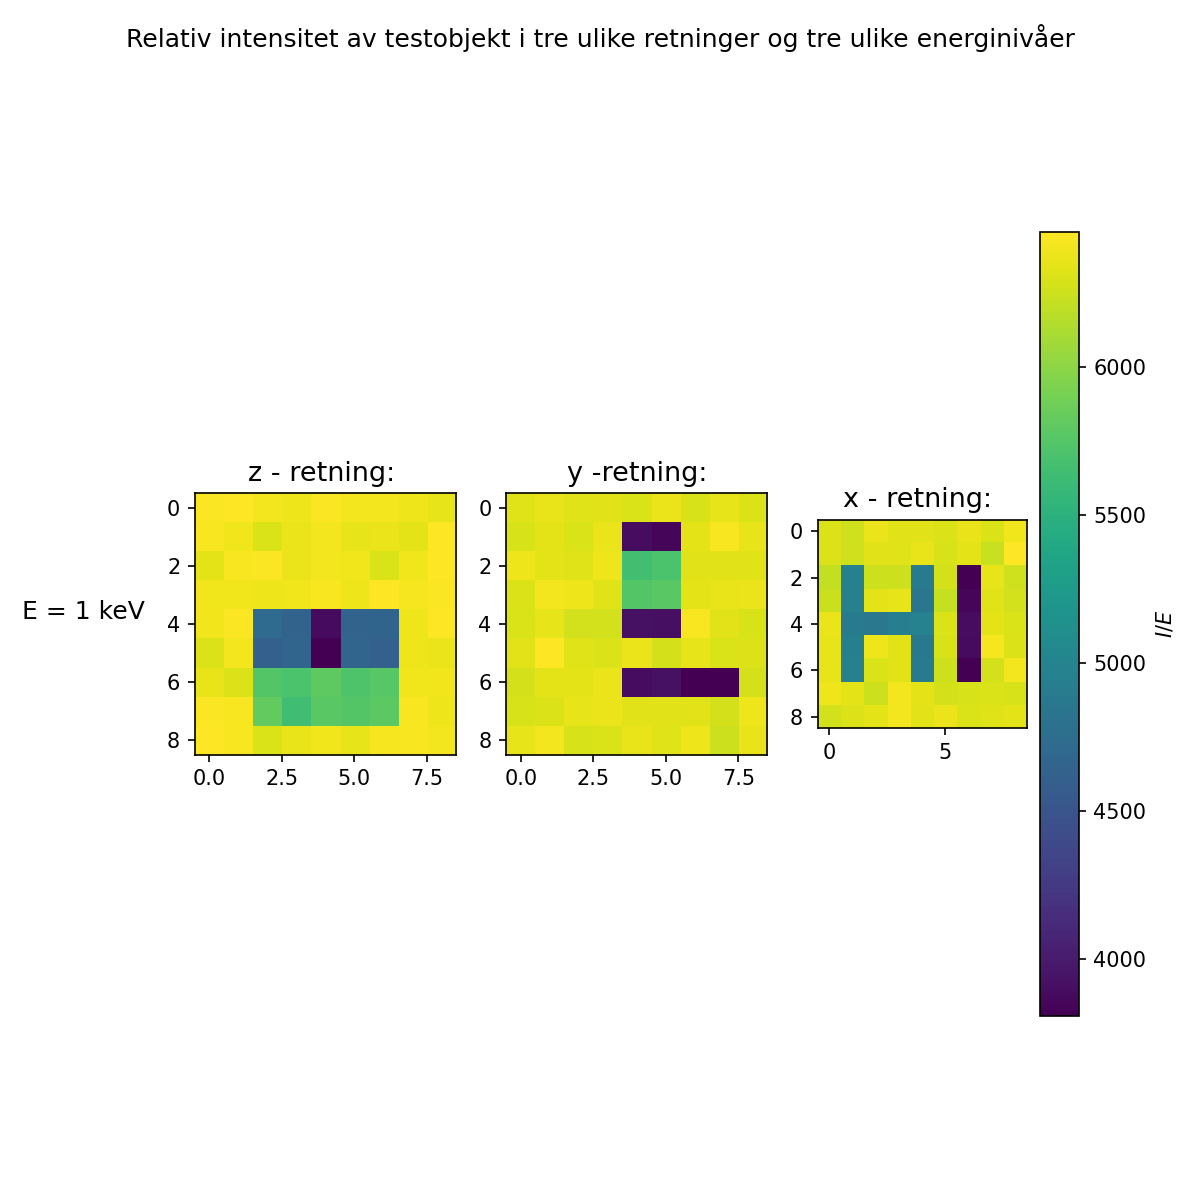

In [33]:
'''Oppgave 3: Testobjekt '''

Testarray = fileRead('test_array.npy') #Leser av testfilen
t1 = time.time() #Tar tiden 

Ntest = nxnPhotons(Testarray, 0.5, 0.5, 0.5, 10000) #Regner ut hvor mange fotoner som kommer gjennom
t2 = time.time()

print(f'Tid brukt: {round((t2 - t1), 2)} s\n') #Tid brukt


fig, axs = plt.subplots(1,3, figsize = (8,8)) #plotter den relative intensiteten av Test-arrayen som et colormap. 

fig.suptitle('Relativ intensitet av testobjekt i tre ulike retninger og tre ulike energinivåer', fontsize = 12)

axs[0].set_title('z - retning: ', fontsize = 13) #Leger på titler, forklarende tekster og andre hjelpeobjekter
axs[1].set_title('y -retning:', fontsize = 13)
axs[2].set_title('x - retning: ', fontsize = 13)

axs[0].set_ylabel('E = 1 keV', rotation = 0, labelpad = 40, fontsize = 12) #Testing av layout, ikke relevant for testobjektet

fig.colorbar(axs[2].imshow(Ntest[2]), ax = axs[2], label = r'$I/E$')



axs[0].imshow(Ntest[0])
axs[1].imshow(Ntest[1])
axs[2].imshow(Ntest[2])



fig.tight_layout()  
plt.show()



Testarray gir samsvarende resultater som det avbildet i oppgaveteksten. Har valgt å plotte den relative intensiteten $I/E$ som i praksis vil si å plotte antall fotoner $N(x, y, z)$. 

Tid brukt: 165.95 s



<IPython.core.display.Javascript object>


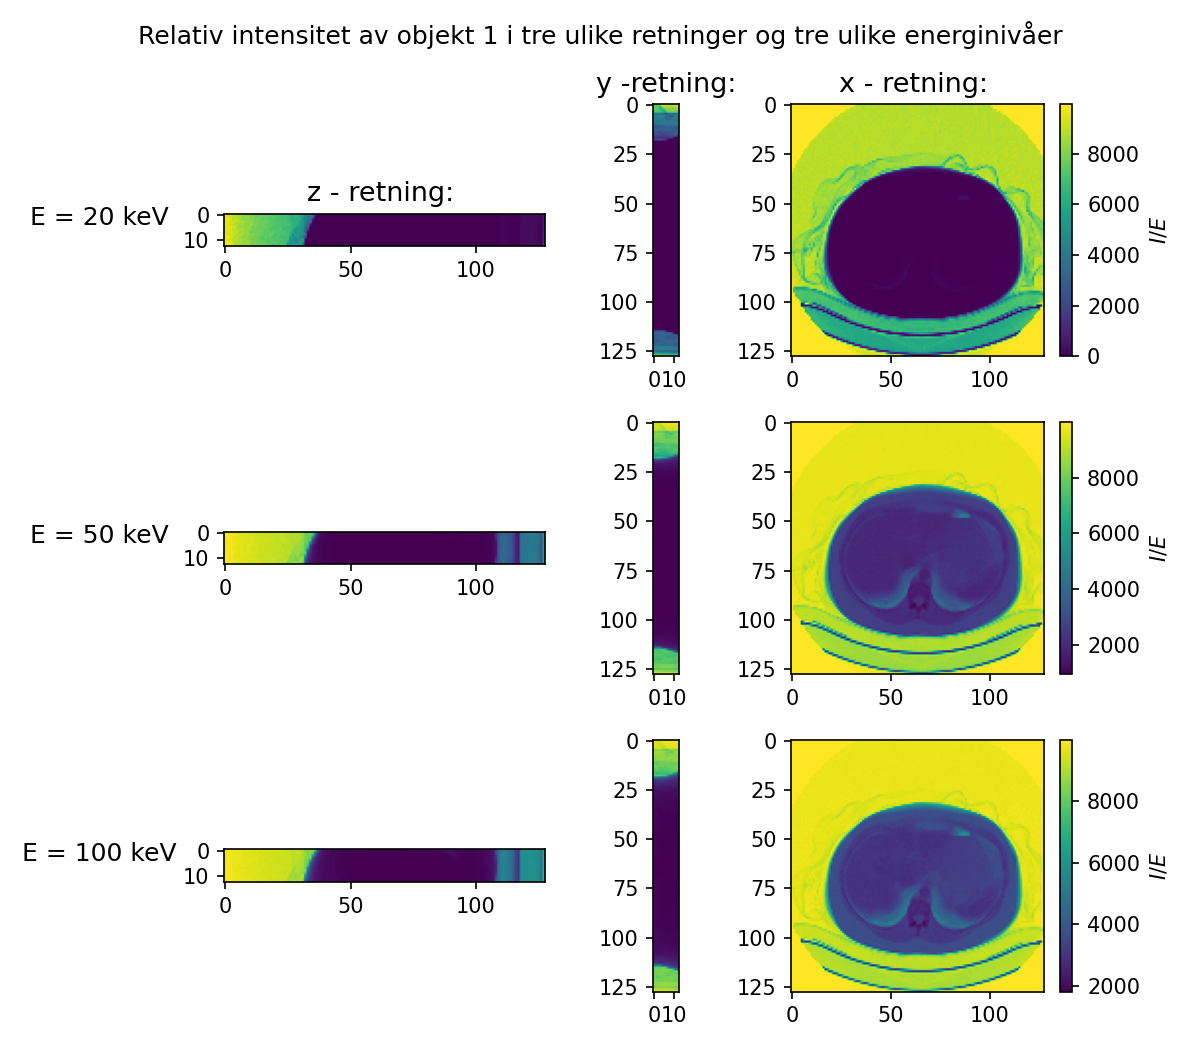

In [35]:
'''Oppgave 3: Objekt 1 '''
t1 = time.time() #Tar tiden 
ob1_20 = fileRead('object1_20keV.npy') #leser av objekt 1 filene for de ulike energinivåene
Nob1_20 = nxnPhotons(ob1_20, 6.5, 44.6, 44.6, 10000)
Iob1_20 = Nob1_20


ob1_50 = fileRead('object1_50keV.npy')
Nob1_50 = nxnPhotons(ob1_50, 6.5, 44.6, 44.6, 10000)
Iob1_50 = Nob1_50


ob1_100 = fileRead('object1_100keV.npy')
Nob1_100 = nxnPhotons(ob1_100, 6.5, 44.6, 44.6, 10000)
Iob1_100 = Nob1_100

t2 = time.time()
print(f'Tid brukt: {round((t2 - t1), 2)} s\n') #Tid brukt

fig, axs = plt.subplots(3,3, figsize = (8,7)) #plotter relativ intesitet I/E = N som colormap

fig.suptitle('Relativ intensitet av objekt 1 i tre ulike retninger og tre ulike energinivåer', fontsize = 12)

axs[0,0].set_title('z - retning: ', fontsize = 13) #Legger på forklarenede objekter for å få fine oversiktlige plots
axs[0,1].set_title('y -retning:', fontsize = 13)
axs[0,2].set_title('x - retning: ', fontsize = 13)

axs[0,0].set_ylabel('E = 20 keV', rotation = 0, labelpad = 40, fontsize = 12)
axs[1,0].set_ylabel('E = 50 keV', rotation = 0, labelpad = 40, fontsize = 12)
axs[2,0].set_ylabel('E = 100 keV', rotation = 0, labelpad = 40, fontsize = 12)

fig.colorbar(axs[0,2].imshow(Iob1_20[2]), ax = axs[0,2], label = r'$I/E$')
fig.colorbar(axs[1,2].imshow(Iob1_50[2]), ax = axs[1,2], label = r'$I/E$')
fig.colorbar(axs[2,2].imshow(Iob1_100[2]), ax = axs[2,2], label = r'$I/E$')

axs[0,0].imshow(Iob1_20[0])
axs[0,1].imshow(Iob1_20[1])
axs[0,2].imshow(Iob1_20[2])

axs[1,0].imshow(Iob1_50[0])
axs[1,1].imshow(Iob1_50[1])
axs[1,2].imshow(Iob1_50[2])

axs[2,0].imshow(Iob1_100[0])
axs[2,1].imshow(Iob1_100[1])
axs[2,2].imshow(Iob1_100[2])


fig.tight_layout()
plt.show()



Her får vi dannet bilder av ulike størrelser av objektet dette gir mening da objektets dimensjoner er ulike og ikke kvadratiske. Best bilder blir dannet med høy energi da det er her vi får kontrasten best frem, men forskjellene mellom $100$ keV og $50$ keV er små, og fra oppgave 2 vet vi at $E = 50$ keV gir en vesentlig lavere dose. Ville derfor valgt i videre undersøkelser å bruke $E = 50$ kev. Det er litt vanskelig å skjønne hva objektet er utifra bildene uten noen kontekst, men vi konkluderer med at objektet ser ut til å være et par med lunger basert på de to dråpeaktige formene i blått i plottene for x-retningen. 

Tid brukt: 186.91 s



<IPython.core.display.Javascript object>


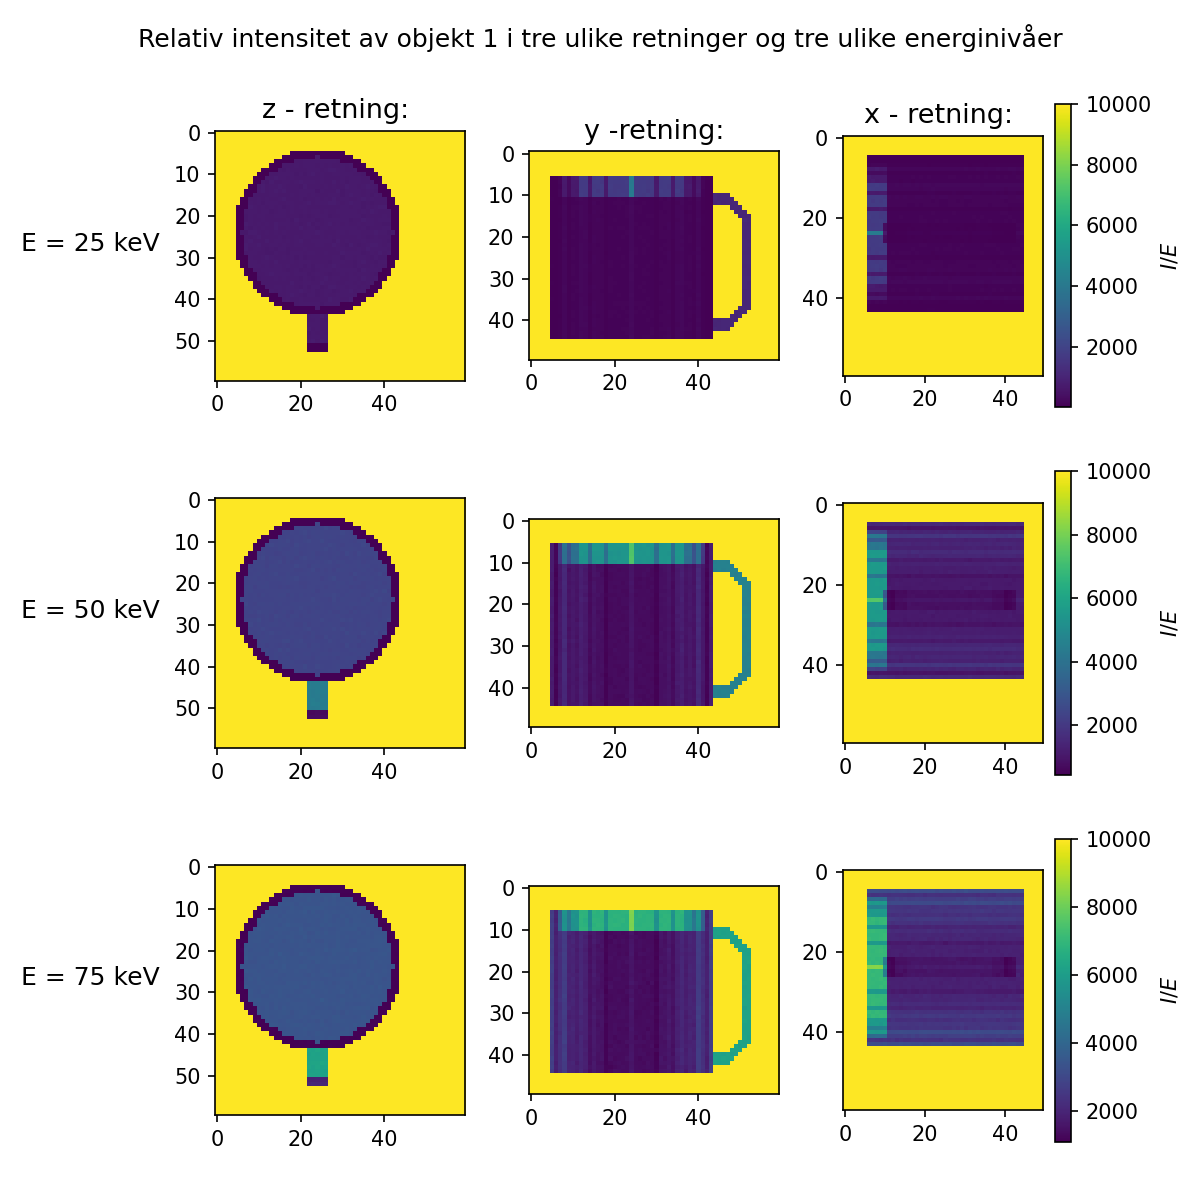

In [36]:
'''Oppgave 3 objekt 2'''
t1 = time.time() #Tar tiden 
ob2_25 = fileRead('object2_25keV.npy')#leser av objekt 2 filene for de ulike energinivåene
Nob2_25 = nxnPhotons(ob2_25, 12, 12, 10, 10000)
Iob2_25 = Nob2_25

ob2_50 = fileRead('object2_50keV.npy')
Nob2_50 = nxnPhotons(ob2_50, 12, 12, 10, 10000)
Iob2_50 = Nob2_50

ob2_75 = fileRead('object2_75keV.npy')
Nob2_75 = nxnPhotons(ob2_75, 12, 12, 10, 10000)
Iob2_75 = Nob2_75

t2 = time.time()
print(f'Tid brukt: {round((t2 - t1), 2)} s\n') #Tid brukt


fig, axs = plt.subplots(3,3, figsize = (8,8))#plotter relativ intesitet I/E = N som colormap

fig.suptitle('Relativ intensitet av objekt 1 i tre ulike retninger og tre ulike energinivåer', fontsize = 12)

axs[0,0].set_title('z - retning: ', fontsize = 13)
axs[0,1].set_title('y -retning:', fontsize = 13)
axs[0,2].set_title('x - retning: ', fontsize = 13)#Legger på forklarenede objekter for å få fine oversiktlige plots

axs[0,0].set_ylabel('E = 25 keV', rotation = 0, labelpad = 40, fontsize = 12)
axs[1,0].set_ylabel('E = 50 keV', rotation = 0, labelpad = 40, fontsize = 12)
axs[2,0].set_ylabel('E = 75 keV', rotation = 0, labelpad = 40, fontsize = 12)

fig.colorbar(axs[0,2].imshow(Iob2_25[2]), ax = axs[0,2], label = r'$I/E$')
fig.colorbar(axs[1,2].imshow(Iob2_50[2]), ax = axs[1,2], label = r'$I/E$')
fig.colorbar(axs[2,2].imshow(Iob2_75[2]), ax = axs[2,2], label = r'$I/E$')

axs[0,0].imshow(Iob2_25[0])
axs[0,1].imshow(Iob2_25[1])
axs[0,2].imshow(Iob2_25[2])

axs[1,0].imshow(Iob2_50[0])
axs[1,1].imshow(Iob2_50[1])
axs[1,2].imshow(Iob2_50[2])

axs[2,0].imshow(Iob2_75[0])
axs[2,1].imshow(Iob2_75[1])
axs[2,2].imshow(Iob2_75[2])

fig.tight_layout()
plt.show()



Objektet er langt enklere å tyde enn det forrige objektet, her er det klart en kopp. Siden vi får høyere intensitet øverst i koppen enn nede så er det rimelig å konkludere med at koppen er fylt med en eller annen væske. Her også er det minimale forskjeller mellom $E = 50$ keV og $E = 75$ keV er dermed fornuftig å bruke $E = 50$ keV i framtidige forsøk. 



**Konklusjon:**
Oppgave 3 viser at vår endimensjonale modell, til tross for forenklingene og antakelsene om dempning, kan brukes til å undersøke tredimensjonale objekter, noe som må sies å være ganske nyttig. Dette tyder på at modellen vår ville kunne feks. fungert som et verktøy i forsøksplanleggning eller til videre forskning og simulasjon av bildedannelse. 


I dette prosjektet har vi sett på en en-dimensjonal modell og det har vist seg å fungere godt til å undersøke et tredimensjonalt objekt.
Vi konkluderer med at modellen vår og  Monte Carlo-metoden egner seg,til tross for alle antagelser og forenklinger vi har gjort, godt til simulering av foton propagasjon i materialer.
